In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model, run_distance_based_model, test_distance_based_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/quercetin_concentration_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0


In [4]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0


# Tree based algorithms

In [5]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [7]:
dtc = DecisionTreeClassifier(max_depth=20, min_samples_leaf=45, max_leaf_nodes=15)

 CV Scores: [0.66308411 0.65981308 0.6546729  0.6635514 ]
 CV Mean score: 0.6602803738317757


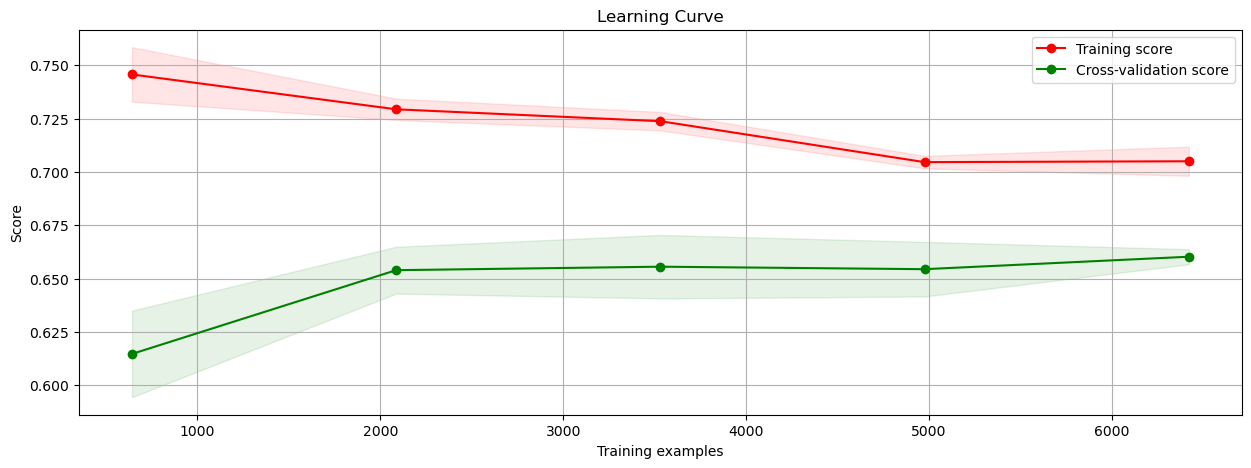

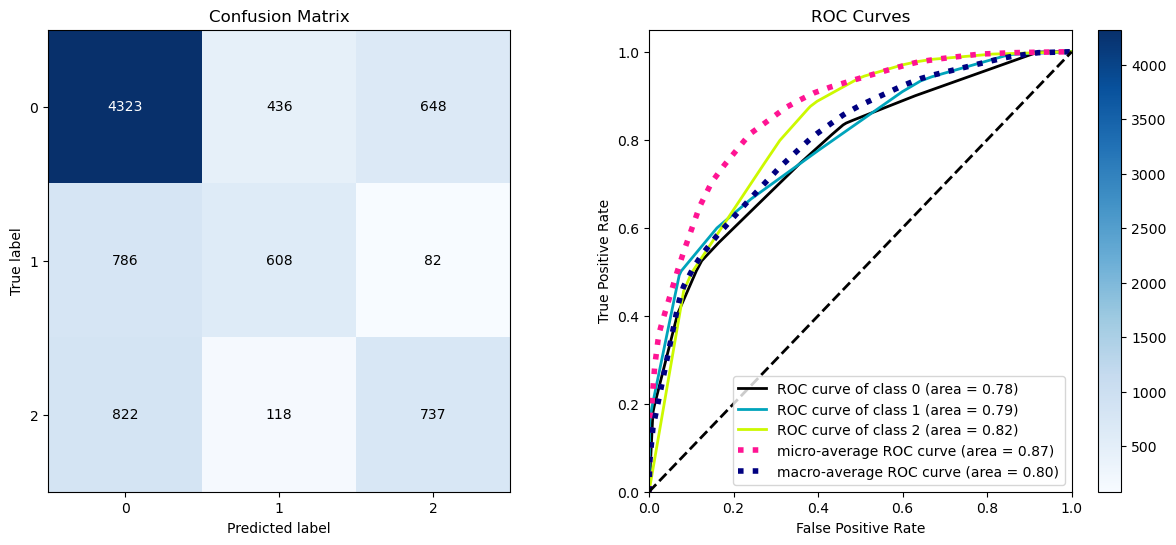

In [8]:
run_model(dtc, X_train, y_train)

In [9]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=15, min_samples_leaf=45)

In [10]:
dtc_pred = dtc.predict(X_test)

In [11]:
f1_score(y_test, dtc_pred, average='weighted')

0.6398077450048826

In [12]:
accuracy_score(y_test, dtc_pred)

0.6509345794392524

## Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(max_depth=20, max_leaf_nodes=15, min_samples_leaf=45)

 CV Scores: [0.70373832 0.69392523 0.69345794 0.6953271 ]
 CV Mean score: 0.6966121495327102


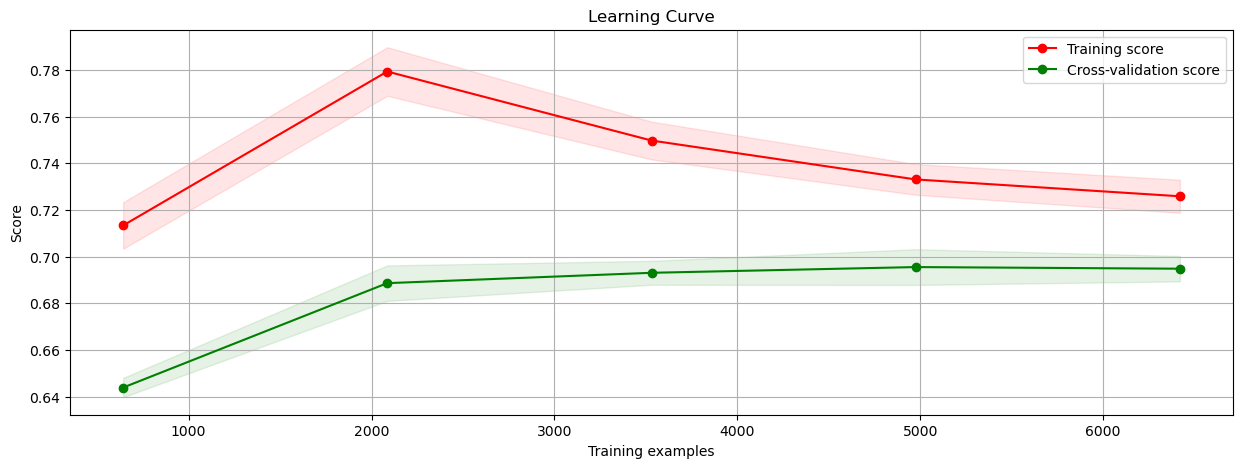

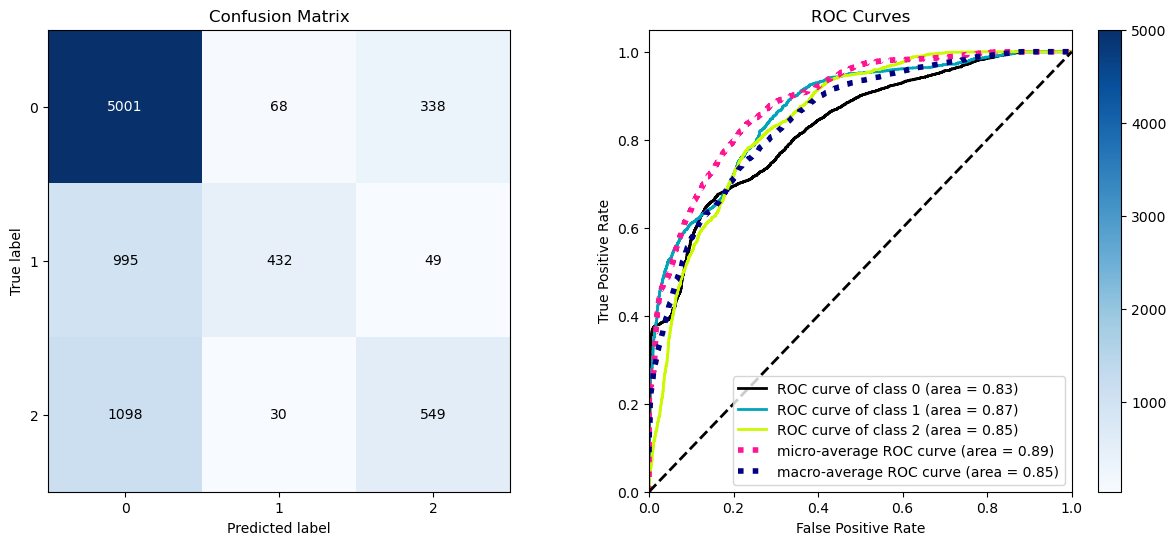

In [14]:
run_model(rfc, X_train, y_train)

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=15, min_samples_leaf=45)

In [16]:
rfc_pred = rfc.predict(X_test)

In [17]:
f1_score(y_test, rfc_pred, average='weighted')

0.6748283087436527

In [18]:
accuracy_score(y_test, rfc_pred)

0.7121495327102804

## XGBoost

In [19]:
xgb = XGBClassifier(n_estimators=25, max_depth=3, alpha=0.5)

 CV Scores: [0.71214953 0.70747664 0.69439252 0.70981308]
 CV Mean score: 0.7059579439252337


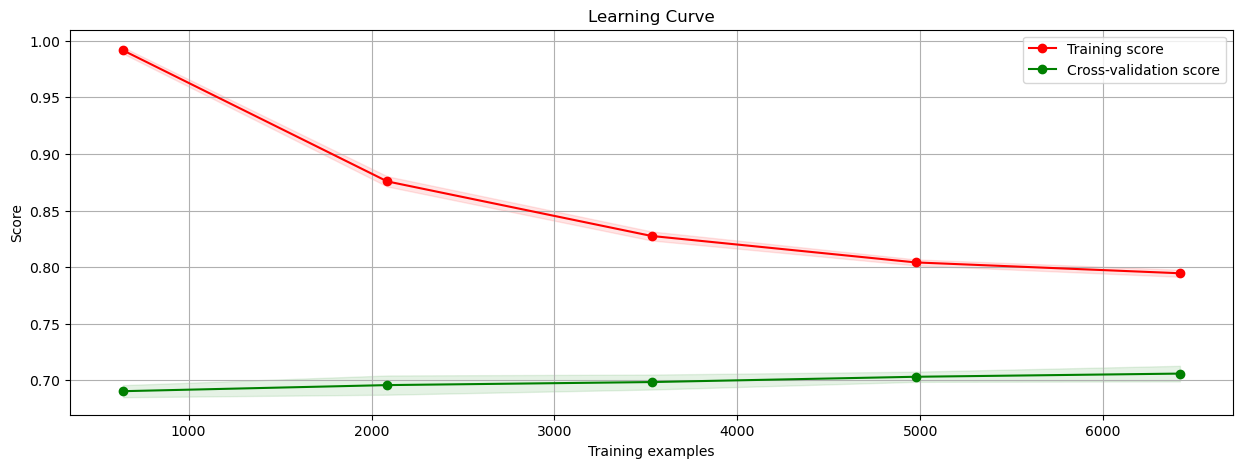

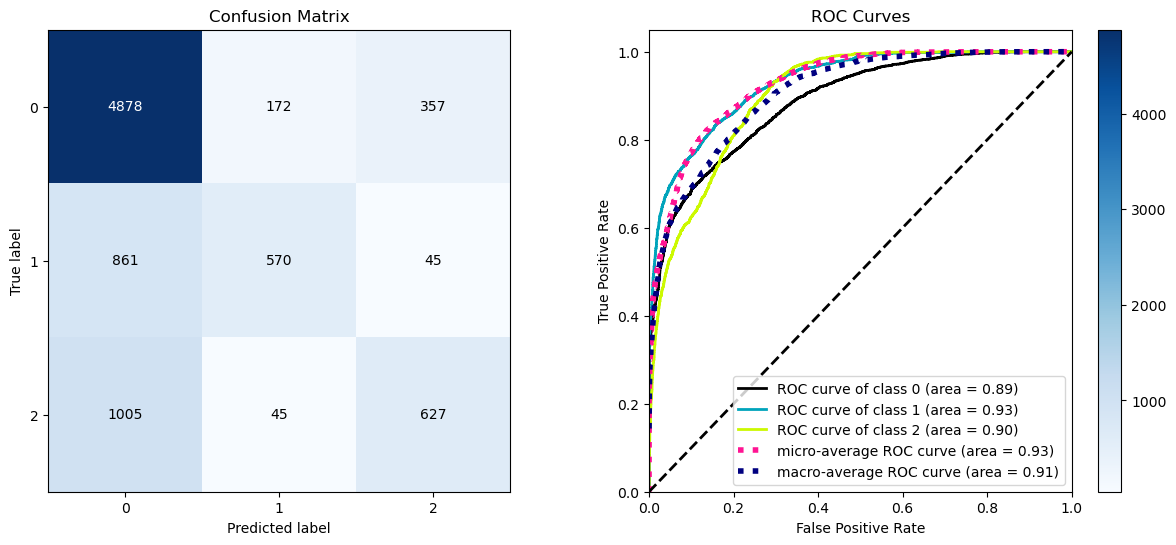

In [20]:
run_model(xgb, X_train, y_train)

In [21]:
xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [22]:
xgb_pred = xgb.predict(X_test)

In [23]:
f1_score(y_test, xgb_pred, average='weighted')

0.6754251983871372

In [24]:
accuracy_score(y_test, xgb_pred)

0.7060747663551402

## Light GBM Classifier

In [57]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=3, min_child_samples=100)

 CV Scores: [0.72196262 0.71121495 0.7046729  0.72009346]
 CV Mean score: 0.7144859813084112


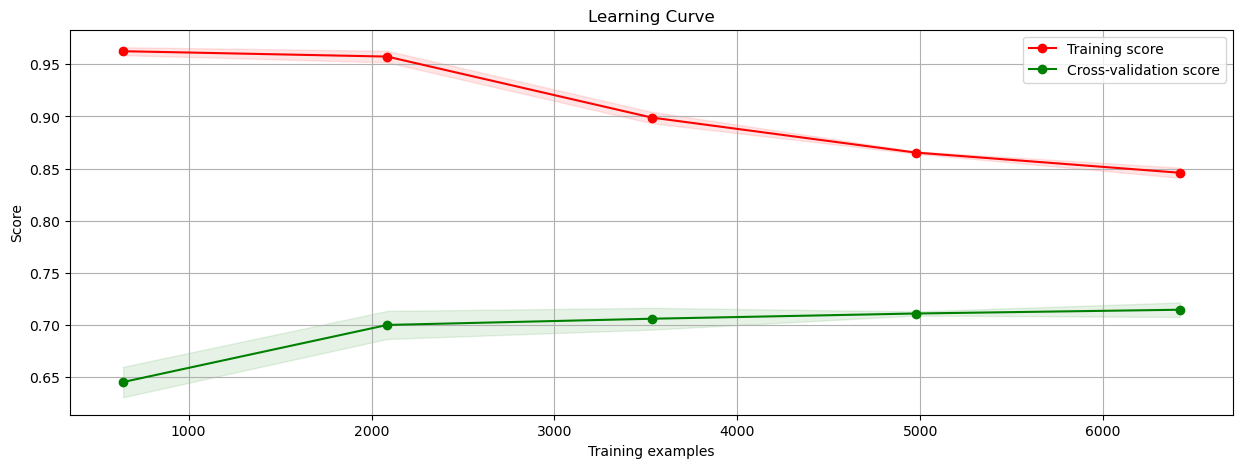

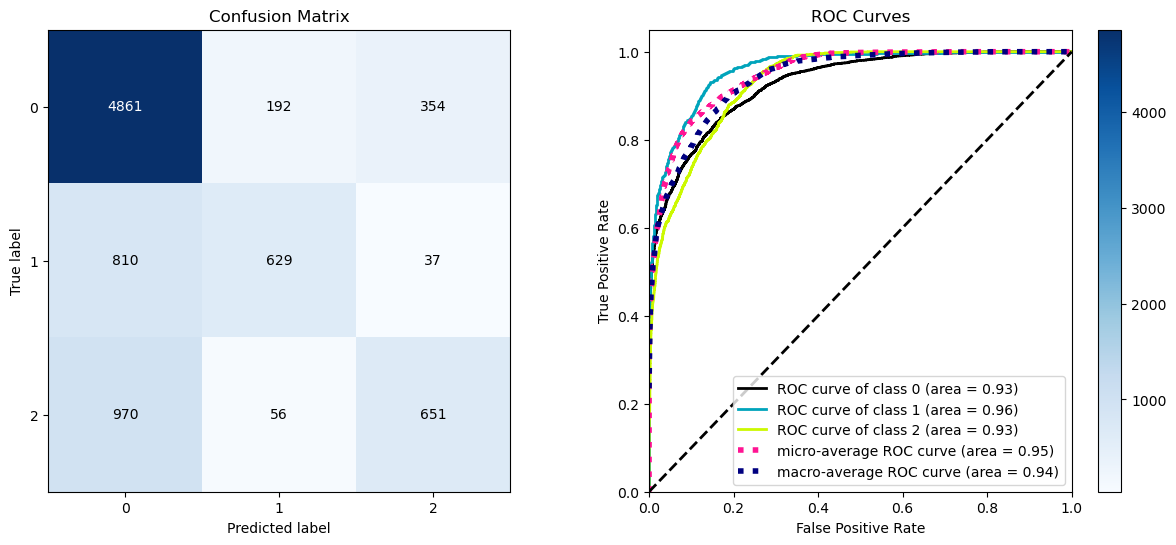

In [58]:
run_model(lgbm, X_train, y_train)

In [59]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=100)

In [60]:
lgbm_pred = lgbm.predict(X_test)

In [61]:
f1_score(y_test, lgbm_pred, average='weighted')

0.6869430101161615

In [62]:
accuracy_score(y_test, lgbm_pred)

0.7140186915887851

## Time Series Forest

In [88]:
tsf = TimeSeriesForest(n_estimators=50, max_depth=30, min_samples_leaf=50, max_leaf_nodes=25)

 CV Scores: [0.73317757 0.71588785 0.72056075 0.72990654]
 CV Mean score: 0.7248831775700935


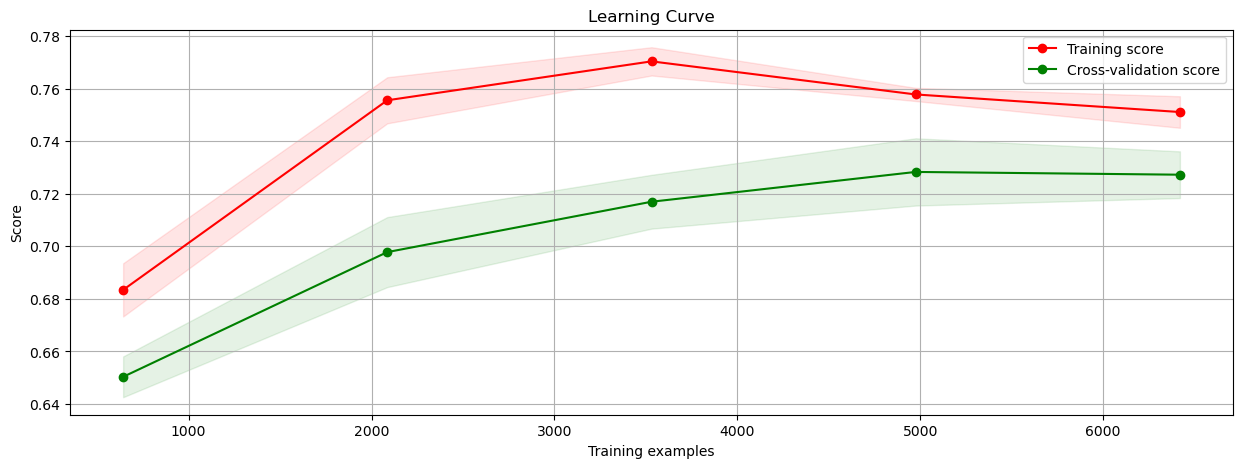

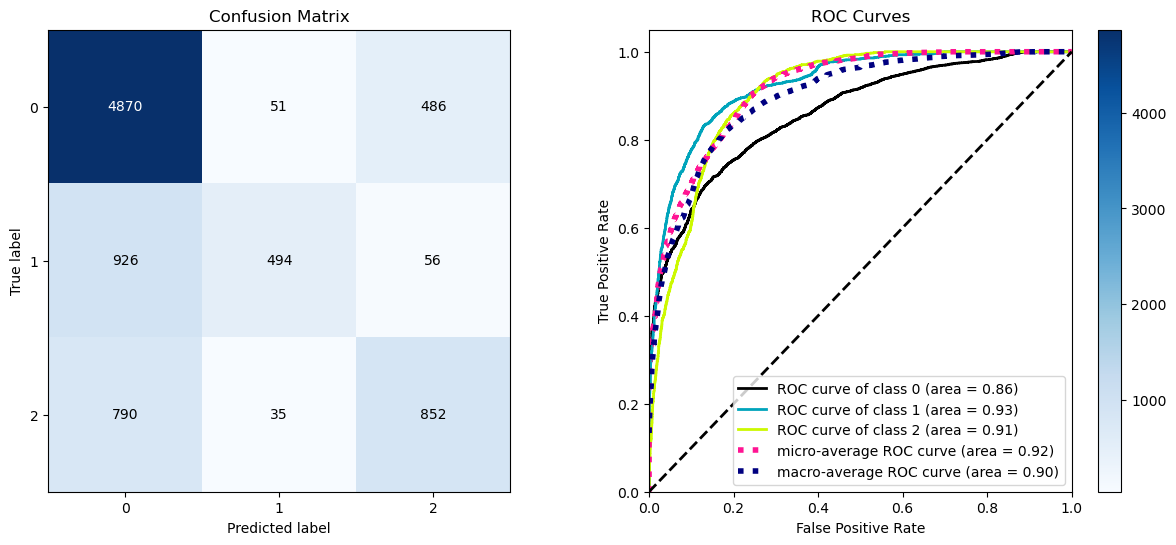

In [89]:
run_model(tsf, X_train, y_train)

In [90]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=30, max_leaf_nodes=25, min_samples_leaf=50,
                 n_estimators=50)

In [91]:
tsf_pred = tsf.predict(X_test)

In [92]:
f1_score(y_test, tsf_pred, average='weighted')

0.7184854232184116

In [93]:
accuracy_score(y_test, tsf_pred)

0.7397196261682243

## TSBF

In [9]:
tsbf = TSBF(n_estimators=100, max_depth=30, min_samples_leaf=65, max_leaf_nodes=45, min_interval_size=100)

 CV Scores: [0.76728972 0.74439252 0.75700935 0.77990654]
 CV Mean score: 0.7621495327102804


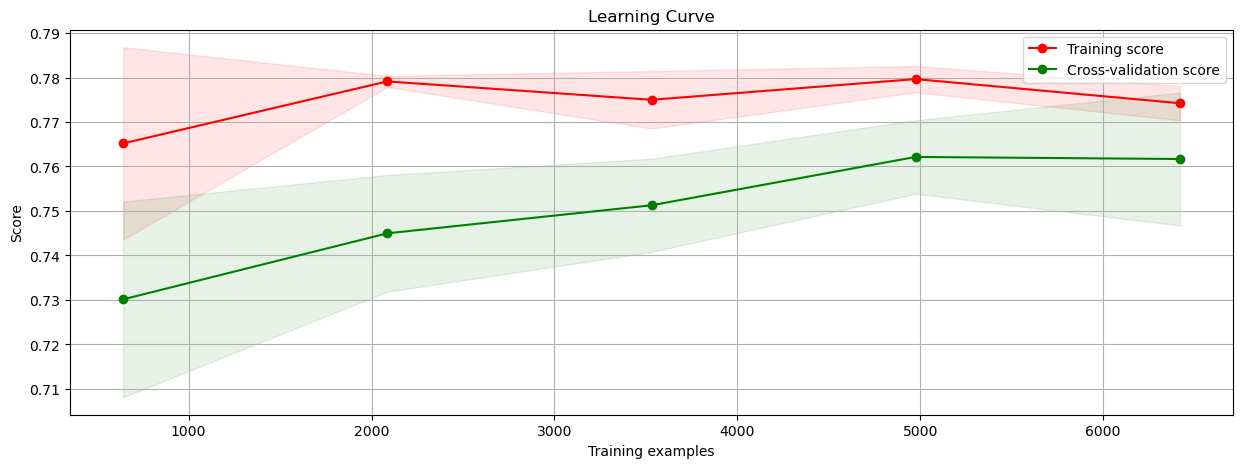

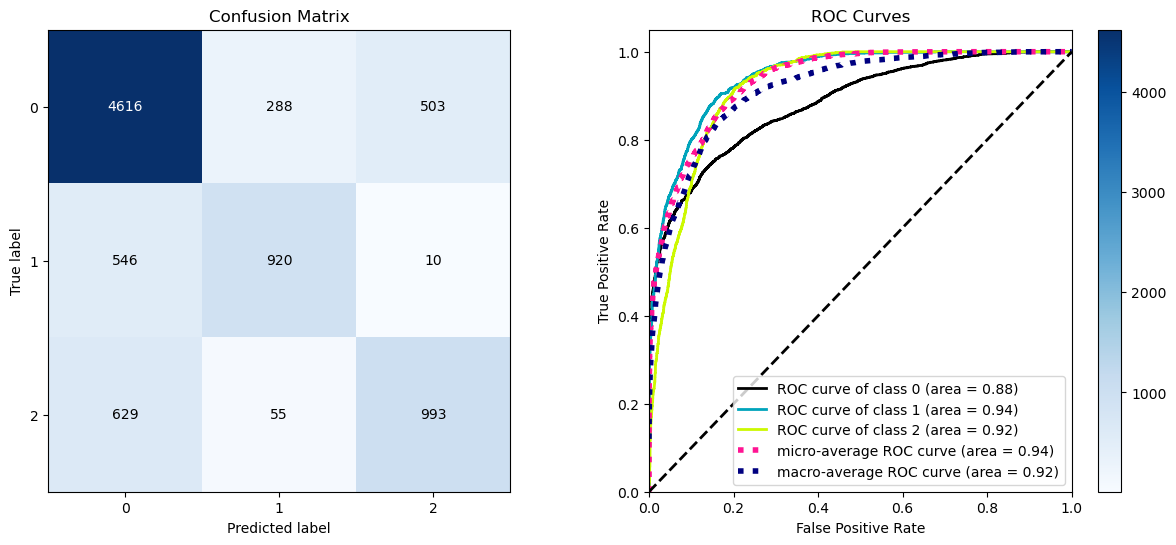

In [10]:
run_model(tsbf, X_train, y_train)

In [11]:
tsbf.fit(X_train, y_train)

TSBF(max_depth=30, max_leaf_nodes=45, min_interval_size=100,
     min_samples_leaf=65, n_estimators=100)

In [12]:
tsbf_pred = tsbf.predict(X_test)

In [13]:
f1_score(y_test, tsbf_pred, average='weighted')

0.7639196097636778

In [14]:
accuracy_score(y_test, tsbf_pred)

0.7705607476635514

# Distance-based algorithms

In [7]:
scaler = MinMaxScaler()

In [8]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.183309,0.186687,0.187205,0.183287,0.188252,0.184973,0.174496,0.188504,0.190634,0.203206,...,0.194373,0.195839,0.190456,0.199567,0.193027,0.187649,0.203624,0.210831,0.207732,0.0
1,0.183646,0.187646,0.198571,0.197868,0.199897,0.200085,0.192764,0.169504,0.173372,0.189272,...,0.185014,0.199640,0.187640,0.178430,0.182275,0.185154,0.188761,0.183722,0.190034,0.0
2,0.189681,0.192051,0.183463,0.177313,0.194576,0.190043,0.183346,0.179033,0.183315,0.194051,...,0.199103,0.196825,0.185138,0.184136,0.194018,0.178255,0.183716,0.180937,0.193473,0.0
3,0.189067,0.185807,0.178442,0.176699,0.187057,0.196038,0.189973,0.191418,0.196137,0.205805,...,0.197247,0.196530,0.200289,0.198366,0.182949,0.174815,0.200836,0.214944,0.215251,0.0
4,0.197318,0.192716,0.206510,0.210592,0.211895,0.210208,0.198802,0.203484,0.191997,0.197579,...,0.199769,0.192767,0.185808,0.180070,0.172197,0.181125,0.202123,0.187214,0.195688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,0.618932,0.581351,0.563241,0.586632,0.609258,0.629958,0.617188,0.603182,0.592333,0.601589,...,0.584001,0.595904,0.609518,0.602886,0.593608,0.599745,0.608724,0.586029,0.580810,1.0
10696,0.587971,0.584231,0.603014,0.603788,0.587329,0.570904,0.582958,0.596586,0.597195,0.595623,...,0.446501,0.538600,0.587511,0.596001,0.602542,0.591631,0.618287,0.602616,0.605737,1.0
10697,0.545930,0.545770,0.581330,0.592137,0.565086,0.575053,0.597176,0.599501,0.593418,0.610593,...,0.379344,0.388628,0.399362,0.394286,0.396017,0.386942,0.371665,0.370686,0.394744,1.0
10698,0.390564,0.376394,0.370544,0.370603,0.394877,0.396192,0.387081,0.412851,0.393133,0.390236,...,0.600128,0.599556,0.576916,0.598651,0.616290,0.632641,0.643110,0.606794,0.592804,1.0


In [9]:
X_distance_based, y_distance_based = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [10]:
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_distance_based, y_distance_based, test_size=0.2, random_state=42)

## k-Nearest Neighbors

In [11]:
knn = KNeighborsClassifier()

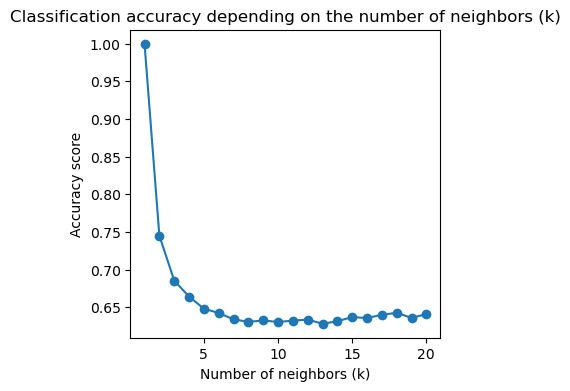

In [12]:
run_distance_based_model(knn, X_train_db, y_train_db)

 CV Scores: [0.61682243 0.61542056 0.5911215  0.61588785]
 CV Mean score: 0.6098130841121495


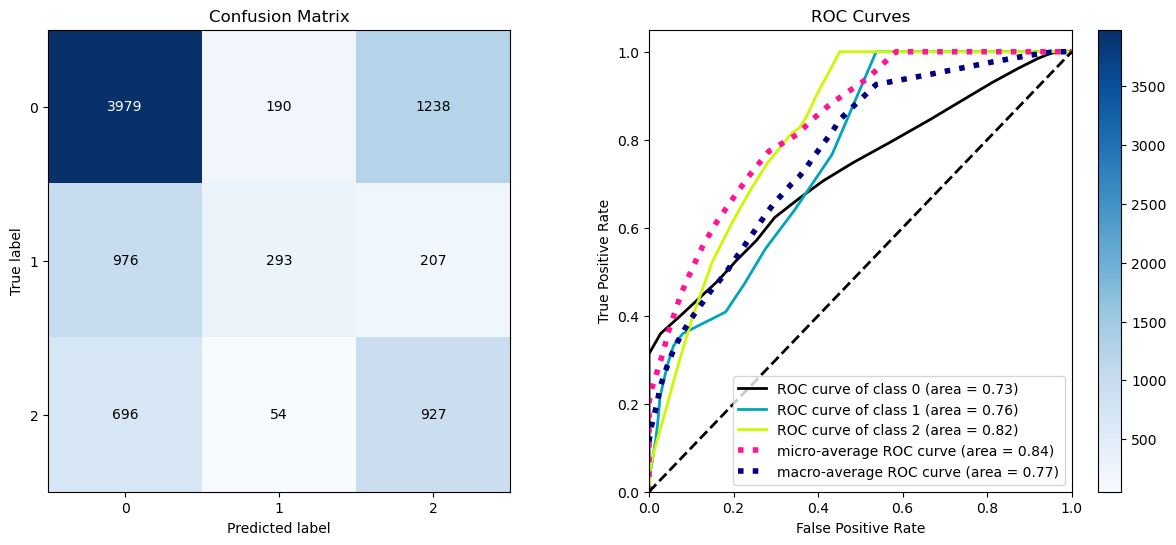

In [13]:
test_distance_based_model(knn, X_train_db, y_train_db)

In [14]:
knn.set_params(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(X_train_db, y_train_db)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_pred = knn.predict(X_test_db)

In [18]:
f1_score(knn_pred, y_test, average='weighted')

0.6147427412639317

In [19]:
accuracy_score(knn_pred, y_test)

0.5929906542056075

## k-Nearest Neighbors with Dynamic Time Warping

In [26]:
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance="dtw")

In [27]:
knn_dtw.fit(X_train_db, y_train_db)

KNeighborsTimeSeriesClassifier(n_neighbors=3)

In [ ]:
knn_dtw_pred = knn_dtw.predict(X_test_db)

In [ ]:
f1_score(knn_dtw_pred, y_test)

In [ ]:
accuracy_score(knn_dtw_pred, y_test)